# **Hand Landmarks Classification - Machine Learning Project**

## **Overview**
This notebook explores hand landmark data to build and evaluate classification models. It covers data preprocessing, feature engineering, model training, evaluation, and visualization.

### **Environment Setup and Data Loading**
This section imports essential libraries for data manipulation (`pandas`, `numpy`), visualization (`matplotlib`), and machine learning (`scikit-learn`, `xgboost`). It also mounts Google Drive to access external files and loads the hand landmarks dataset into a Pandas DataFrame for further processing.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/My Drive/ML1_project/hand_landmarks_data.csv'
df = pd.read_csv(path)

### **Data Exploration**

In this section, we perform a preliminary exploration of the dataset:

1. **df.info()**: After running this function, we confirmed that the data types are correctly assigned and there are no missing values in the dataset.

2. **df.describe()**: The statistical summary revealed that most features have different scales, which may require scaling before model training.

3. **df['label'].value_counts()**: The class distribution is nearly balanced, which suggests that class imbalance is not a concern for training.


In [4]:
df.head(5)

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [6]:
duplicated_data = df[df.duplicated()]
print(len(duplicated_data))

0


In [7]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


In [8]:
df['label'].value_counts()

,count
label,
three2,1653
palm,1649
four,1634
ok,1592
stop_inverted,1567
call,1506
peace_inverted,1497
stop,1482
rock,1458


### **Data Preprocessing and Plotting**

In this section, we preprocess the hand landmark data and create functions to visualize the landmarks in 2D.

#### Preprocessing

The preprocessing step focuses on adjusting the hand landmark coordinates by performing two key operations:
1. **Re-centering**: The coordinates are re-centered around the wrist position to normalize the hand orientation.
2. **Scaling**: The coordinates are then scaled using the distance between the wrist and the middle finger tip to ensure consistent scaling across all hand data.

#### Plotting Hand Landmarks

The plotting functions are used to visualize the 2D hand landmarks:
- The **`plot_hand_landmarks_2d`** function takes the x and y coordinates of the landmarks and displays them in 2D with connections representing the hand's skeletal structure.
- The **`plot_hand_from_df`** function extracts landmark data from a specific row in the dataframe and uses the `plot_hand_landmarks_2d` function to visualize the hand landmarks.

These visualization functions help to understand the spatial distribution of hand landmarks and verify the preprocessing steps.


In [9]:
def preprocessing(df):
    """
    Preprocesses hand landmark data by re-centering and scaling the coordinates.

    Args:
        df (pd.DataFrame): The dataframe containing hand landmark data.

    Modifies the dataframe inplace, re-centering and scaling the coordinates.
    """


    num_landmarks = len(df.columns) // 3

    # Extract wrist (x0, y0) and middle finger tip (x12, y12) positions
    wrist_x = df.iloc[:, 0]
    wrist_y = df.iloc[:, 1]
    mid_finger_y = df['y12']  # y12 (Middle Finger Tip Y)

    # Create a new DataFrame to store processed data
    df_processed = df.copy()

    for i in range(num_landmarks):
        x_col = i * 3
        y_col = x_col + 1

        # Re-center (x, y) based on wrist position
        df_processed.iloc[:, x_col] -= wrist_x
        df_processed.iloc[:, y_col] -= wrist_y

        # Scale (x, y) using the middle finger tip relative to wrist
        scale_factor = mid_finger_y - wrist_y


        df_processed.iloc[:, x_col] /= scale_factor
        df_processed.iloc[:, y_col] /= scale_factor


    df[:] = df_processed


In [10]:
preprocessing(df)

In [11]:
def plot_hand_landmarks_2d(landmarks_x, landmarks_y, title="Hand Landmarks"):
    """
    Plots 2D hand landmarks with connections representing the hand structure.

    Parameters:
    landmarks_x (list): List of x-coordinates for the hand landmarks.
    landmarks_y (list): List of y-coordinates for the hand landmarks.
    title (str): Title for the plot.
    """
    plt.figure(figsize=(5, 5))
    plt.scatter(landmarks_x, landmarks_y, color='blue', s=50)

    # Define hand structure connections
    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),  # Thumb
        (0, 5), (5, 6), (6, 7), (7, 8),  # Index
        (0, 9), (9, 10), (10, 11), (11, 12),  # Middle
        (0, 13), (13, 14), (14, 15), (15, 16),  # Ring
        (0, 17), (17, 18), (18, 19), (19, 20)  # Pinky
    ]

    # Draw connections between landmarks
    for start, end in connections:
        plt.plot(
            [landmarks_x[start], landmarks_x[end]],
            [landmarks_y[start], landmarks_y[end]],
            color="gray", linewidth=2
        )

    # Set plot labels and title
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()


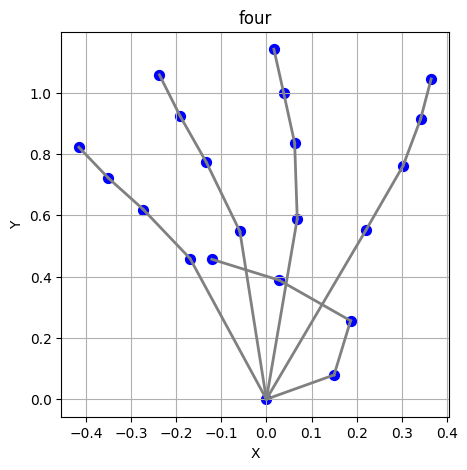

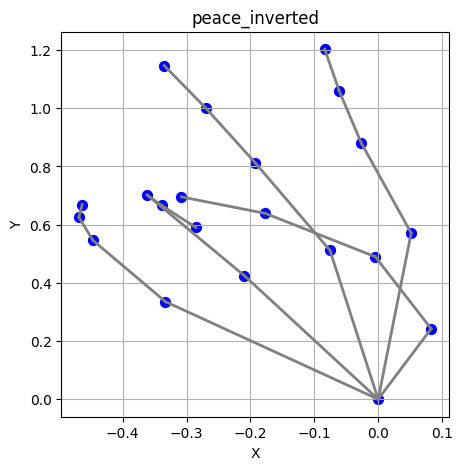

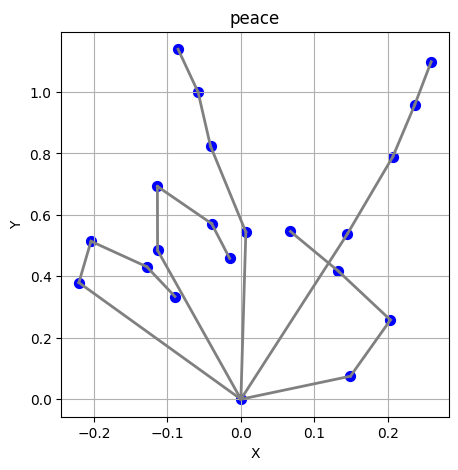

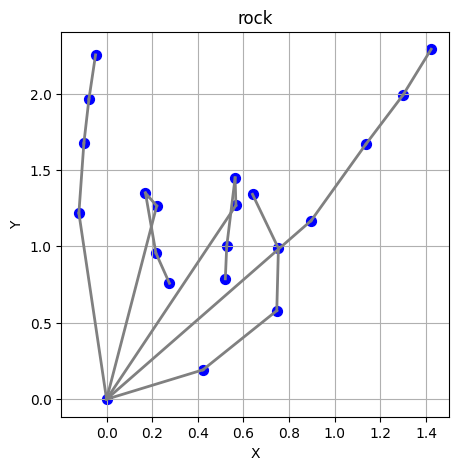

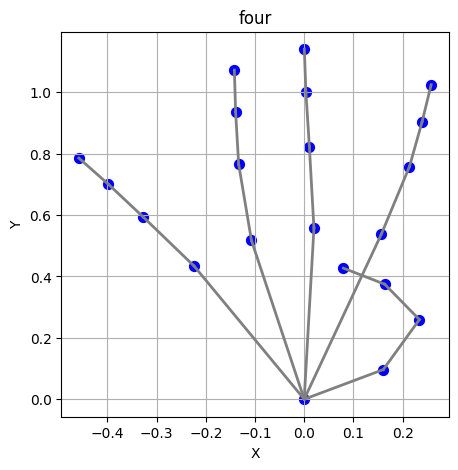

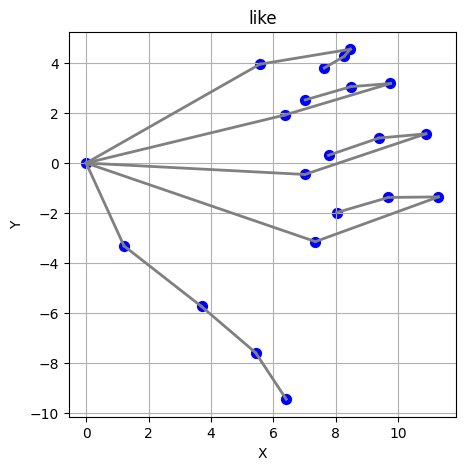

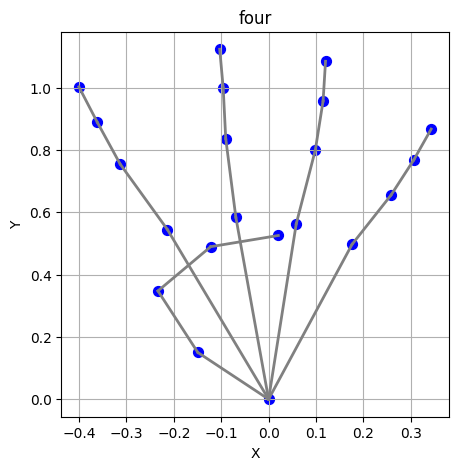

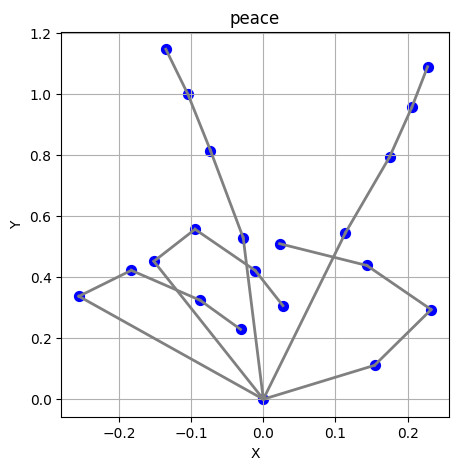

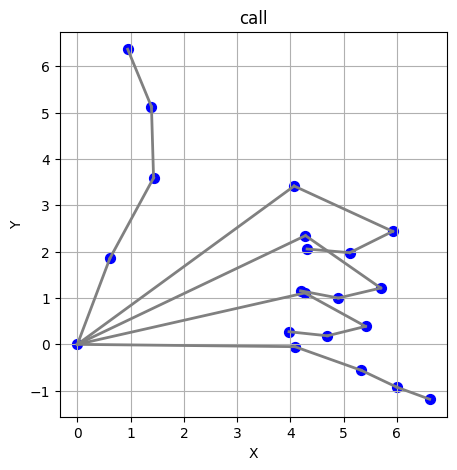

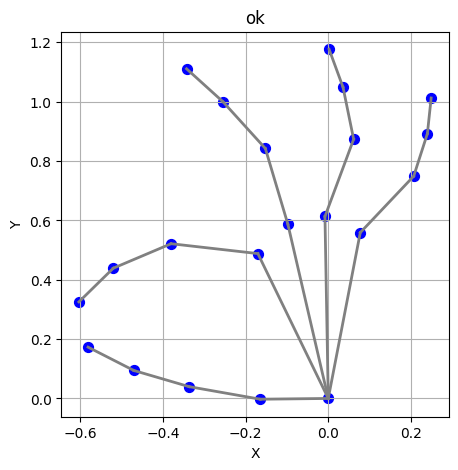

In [12]:
def plot_hand_from_df(df, row=0, title='hand'):
    """
    Extracts hand landmarks from a dataframe row and plots them.

    Parameters:
    df (DataFrame): DataFrame containing hand landmark data.
    row (int): Row index to select the landmarks from.
    title (str): Title for the plot.
    """
    num_landmarks = len(df.columns) // 3

    landmarks_x = [df.iloc[row, i * 3] for i in range(num_landmarks)]
    landmarks_y = [df.iloc[row, i * 3 + 1] for i in range(num_landmarks)]

    plot_hand_landmarks_2d(landmarks_x, landmarks_y, title)

# Example usage to plot hand landmarks for a random selection of rows
indices = np.random.choice(df.index, size=10)
for i in indices:
    title = df.iloc[i]['label']
    plot_hand_from_df(df, row=i, title=title)


### **Data Splitting and Preprocessing**

In this section, the dataset is divided into features (`X`) and labels (`y`). The data is then split into training, validation, and test sets using `train_test_split` from `sklearn`. The split ratio ensures that 70% of the data is used for training, with the remaining 30% divided equally between validation and test sets. Stratification is applied to maintain the distribution of the labels across the splits.

- **Training, Validation, and Test Sets**: The shapes of the training, validation, and test sets are printed to verify the data partitioning.

Next, label encoding is applied to the target variable (`y_train`, `y_test`, and `y_validation`) using `LabelEncoder` to convert the categorical labels into numerical values.

Finally, the feature data (`X_train`, `X_validation`, `X_test`) is standardized using `StandardScaler` to ensure that all features have a mean of 0 and a standard deviation of 1, which helps improve the performance of machine learning models.

#### **Key Steps**:
1. Split data into training, validation, and test sets with stratification.
2. Encode categorical labels into numerical values using label encoding.
3. Standardize the feature data to ensure consistent scaling for the models.


In [13]:
X = df.drop(columns=['label'])
y = df['label']

In [14]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=.3, stratify=y)

In [15]:
X_test, X_validation, y_test, y_validation = train_test_split(X_, y_, test_size=.5, stratify=y_)

In [16]:
print(f"training shape : {X_train.shape}")
print(f"validation shape : {X_validation.shape}")
print(f"test shape : {X_test.shape}")

training shape : (17972, 63)
validation shape : (3852, 63)
test shape : (3851, 63)


In [17]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_validation = label_encoder.transform(y_validation)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

In [19]:
########################################################################################33

### **Random Forest Model Training and Evaluation**

A Random Forest model is trained on the training data (`X_train`, `y_train`) and evaluated on the validation set (`X_validation`). The model’s accuracy and classification report are printed for both the validation and test sets (`X_test`). This provides insights into the model’s performance in terms of precision, recall, and F1-score.


In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_validation)

print("Random Forest Accuracy on validation set:", accuracy_score(y_validation, y_pred_rf))
print(classification_report(y_validation, y_pred_rf))

Random Forest Accuracy on validation set: 0.9652128764278297
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       226
           1       0.98      0.97      0.98       194
           2       0.99      0.99      0.99       141
           3       0.94      0.96      0.95       245
           4       0.95      0.95      0.95       216
           5       0.96      0.96      0.96       163
           6       0.99      0.99      0.99       239
           7       0.98      0.96      0.97       189
           8       0.98      0.97      0.98       248
           9       0.93      0.94      0.93       216
          10       0.96      0.96      0.96       225
          11       0.99      0.99      0.99       219
          12       0.94      0.97      0.95       223
          13       0.97      0.99      0.98       235
          14       0.99      0.94      0.96       219
          15       0.98      0.98      0.98       248
          16       0

In [21]:
y_pred_test = rf_model.predict(X_test)

print("Random Forest Accuracy on test set:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Random Forest Accuracy on test set: 0.9703972994027525
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       226
           1       0.99      0.98      0.99       195
           2       1.00      1.00      1.00       142
           3       0.97      0.99      0.98       245
           4       0.95      0.93      0.94       215
           5       0.98      0.95      0.97       163
           6       1.00      1.00      1.00       239
           7       0.95      0.97      0.96       190
           8       0.98      1.00      0.99       247
           9       0.92      0.95      0.94       216
          10       0.97      0.95      0.96       224
          11       1.00      1.00      1.00       218
          12       0.97      0.96      0.97       222
          13       0.97      0.98      0.97       235
          14       1.00      0.97      0.99       218
          15       0.99      0.98      0.99       248
          16       0.95   

In [22]:
#################################################################################

### **SVM Model with Grid Search and Evaluation**

A Support Vector Machine (SVM) model with an RBF kernel is trained using a GridSearchCV to optimize hyperparameters (`C` and `gamma`). The best model, based on cross-validation, is selected and evaluated on both the validation and test sets. Accuracy and detailed classification reports are printed for both sets, providing insights into model performance.


In [23]:
# uncomment and run if you want it takes nearly one hour

"""
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search.best_params_)

#the best model
best_svm_model = grid_search.best_estimator_
"""

# the best results was :: [Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}]

'\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'C\': [0.1, 1, 10, 100],\n    \'gamma\': [0.0001, 0.001, 0.01, 0.1, 1],\n    \'kernel\': [\'rbf\']\n}\n\ngrid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring=\'accuracy\', n_jobs=-1)\ngrid_search.fit(X_train_scaled, y_train)\nprint("Best parameters:", grid_search.best_params_)\n\n#the best model\nbest_svm_model = grid_search.best_estimator_\n'

In [24]:
svm_model = SVC(kernel='rbf', C=100, gamma=.1)  # RBF kernel for nonlinear separation
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_validation)

print("SVM Accuracy:", accuracy_score(y_validation, y_pred_svm))
print(classification_report(y_validation, y_pred_svm,zero_division=0))


SVM Accuracy: 0.9628764278296988
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       226
           1       0.97      0.77      0.86       194
           2       0.99      0.99      0.99       141
           3       0.97      1.00      0.98       245
           4       0.97      0.81      0.88       216
           5       0.96      0.96      0.96       163
           6       1.00      1.00      1.00       239
           7       0.98      0.96      0.97       189
           8       0.99      0.98      0.98       248
           9       0.98      0.98      0.98       216
          10       1.00      0.99      0.99       225
          11       0.99      0.99      0.99       219
          12       0.96      0.99      0.97       223
          13       0.99      0.99      0.99       235
          14       1.00      0.95      0.97       219
          15       1.00      0.99      0.99       248
          16       0.98      0.98      0.98     

In [25]:
y_pred_svm2 = svm_model.predict(X_test)

print("SVM Accuracy on test set:", accuracy_score(y_test, y_pred_svm2))
print(classification_report(y_test, y_pred_svm2))

SVM Accuracy on test set: 0.9665022072189042
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       226
           1       0.97      0.77      0.86       195
           2       0.99      1.00      0.99       142
           3       0.98      1.00      0.99       245
           4       0.95      0.80      0.87       215
           5       0.97      0.96      0.96       163
           6       1.00      1.00      1.00       239
           7       0.96      0.96      0.96       190
           8       0.99      1.00      1.00       247
           9       0.99      0.98      0.99       216
          10       0.99      0.98      0.99       224
          11       1.00      1.00      1.00       218
          12       0.98      0.98      0.98       222
          13       0.99      0.98      0.99       235
          14       1.00      0.98      0.99       218
          15       1.00      0.99      0.99       248
          16       1.00      1.00   

In [26]:
######################################################################################################

### **XGBoost Model Training and Evaluation**
In this section, we train the XGBoost model with specified hyperparameters, including the number of estimators (100), learning rate (0.1), and maximum depth (6). The model is evaluated on both the validation and test sets. The performance is assessed using accuracy and classification report metrics, which include precision, recall, and F1-score for each class.


In [27]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_validation)

print("XGBoost Accuracy:", accuracy_score(y_validation, y_pred_xgb))
print(classification_report(y_validation, y_pred_xgb))


XGBoost Accuracy: 0.976895119418484
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       226
           1       0.99      0.98      0.99       194
           2       0.99      0.99      0.99       141
           3       0.97      0.99      0.98       245
           4       0.97      0.99      0.98       216
           5       0.96      0.94      0.95       163
           6       1.00      0.99      0.99       239
           7       0.97      0.96      0.97       189
           8       0.98      0.98      0.98       248
           9       0.94      0.97      0.95       216
          10       0.98      0.98      0.98       225
          11       0.99      1.00      0.99       219
          12       0.96      0.99      0.97       223
          13       0.99      0.98      0.99       235
          14       0.99      0.95      0.97       219
          15       0.99      0.98      0.98       248
          16       0.96      0.96      0.96  

In [28]:
y_pred_xgb2 = xgb_model.predict(X_test)

print("XGBoost Accuracy on test set:", accuracy_score(y_test, y_pred_xgb2))
print(classification_report(y_test, y_pred_xgb2))

XGBoost Accuracy on test set: 0.9750714100233705
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       226
           1       0.97      0.98      0.98       195
           2       1.00      0.99      1.00       142
           3       0.98      1.00      0.99       245
           4       0.98      0.98      0.98       215
           5       0.97      0.94      0.96       163
           6       0.99      1.00      0.99       239
           7       0.93      0.96      0.95       190
           8       0.98      0.99      0.98       247
           9       0.94      0.96      0.95       216
          10       0.96      0.94      0.95       224
          11       1.00      1.00      1.00       218
          12       0.98      0.95      0.97       222
          13       0.97      0.98      0.98       235
          14       1.00      0.98      0.99       218
          15       1.00      0.98      0.99       248
          16       0.96      0.9

In [29]:
############################################################################################################################

### **Model Comparison and Evaluation**
In this section, we compare the performance of the three models (Random Forest, SVM, and XGBoost) on the validation set. The comparison is visualized using a bar plot, where the accuracies of each model are displayed as percentages. Additionally, confusion matrices for each model are plotted to provide further insights into their classification performance on the test set. The confusion matrices help identify the number of true positives, true negatives, false positives, and false negatives for each model, allowing for a more detailed evaluation.


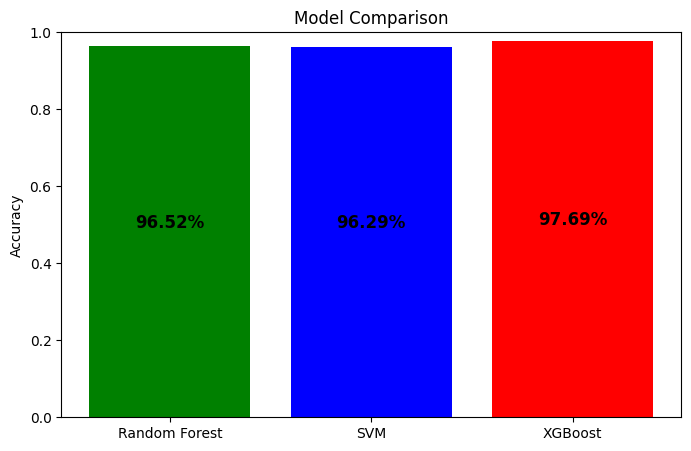

In [30]:
models = ["Random Forest", "SVM", "XGBoost"]
accuracies = [
    accuracy_score(y_validation, y_pred_rf),
    accuracy_score(y_validation, y_pred_svm),
    accuracy_score(y_validation, y_pred_xgb)
]


plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['green', 'blue', 'red'])


for bar, acc in zip(bars, accuracies):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height()/2,
        f"{acc:.2%}",
        ha='center', va='bottom', fontsize=12, fontweight='bold'
    )

# Labels and title
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()


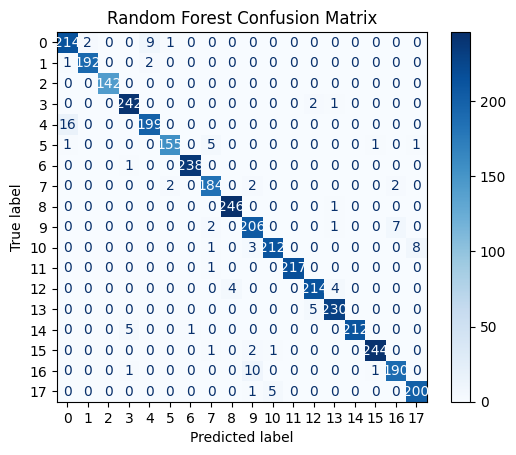

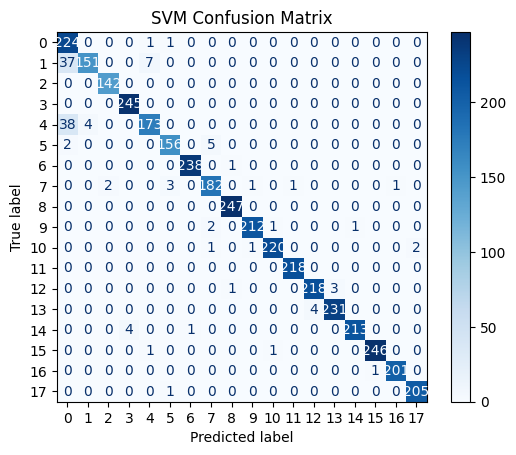

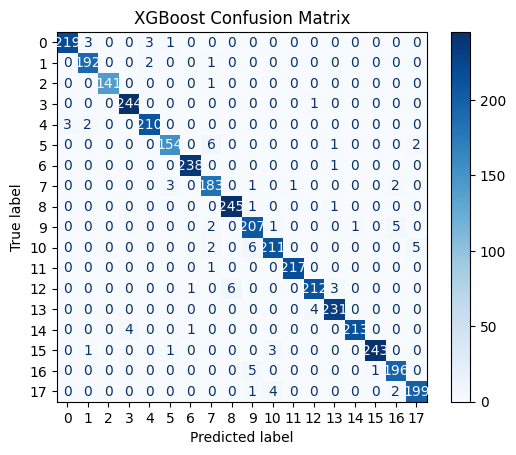

In [31]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.show()


In [32]:
#########################################################################################################################

### **Conclusion**
After evaluating the performance of three models—Random Forest, SVM, and XGBoost—we observed that the XGBoost model achieved the highest accuracy on both the validation and test sets. Based on these results, we have selected XGBoost as the final model for hand landmarks classification. This model demonstrates strong performance and will be further explored for potential improvements and deployment.


In [33]:
# uncomment of you want to download the model and label_encoder

"""
import joblib
from google.colab import files

joblib.dump(xgb_model, "XG_hand_gesture_model.pkl")
files.download("XG_hand_gesture_model.pkl")

joblib.dump(label_encoder, "label_encoder.pkl")
files.download("label_encoder.pkl")
"""

'\nimport joblib\nfrom google.colab import files\n\njoblib.dump(xgb_model, "XG_hand_gesture_model.pkl")\nfiles.download("XG_hand_gesture_model.pkl")\n\njoblib.dump(label_encoder, "label_encoder.pkl")\nfiles.download("label_encoder.pkl")\n'